## Лабораторная работа 1. Знакомство с библиотеками для анализа данных

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### О задании

Лабораторная работа №1 направлена на работу с пакетами NumPy, Pandas и Matplotlib путём решения набора задач. В данном задании разрешено пользоваться только стандартной библиотекой языка Python, а также пакетами NumPy, Pandas и Matplotlib. Целью задания является редактирование данного ipython notebook-a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в задании функции.

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.
Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

###  Правила сдачи

Описаны на странице курса.

### (5 баллов) Знакомство с Numpy

Во всех заданиях данного раздела запрещено использовать циклы. Под матрицей в данных заданиях понимается двумерный numpy.array.

In [2]:
import numpy as np

**1. (0.5 балла)** Реализуйте функцию, принимающую на вход матрицу X и два массива i и j одинаковой длины и возвращающую вектор np.array, состоящий из последовательности элементов [X[i[0], j[0]], X[i[1], j[1]], ..., X[i[N-1], j[N-1]]].

In [3]:
def construct_array(X, i, j):
    return X[i, j]

# Testing
X_test = np.random.rand(3, 3)
print X_test
i_test = [1, 1, 2]
j_test = [0, 1, 2]
result = construct_array(X_test, i_test, j_test)
result

[[ 0.48195448  0.16300601  0.64724338]
 [ 0.73734807  0.63845254  0.11067192]
 [ 0.07787699  0.7435156   0.42012408]]


array([ 0.73734807,  0.63845254,  0.42012408])

**2. (0.5 балла)** Написать функцию для подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы.
Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответом является 3. Если ненулевых элементов нет, функция должна возвращать None.

In [4]:
def nonzero_product(X):
    diag = np.diagonal(X)
    non_zero = diag[diag != 0]
    if non_zero.size != 0:
        return non_zero.prod()
    else:
        return None

X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
result = nonzero_product(X)
print result

X = np.array([[0, 0, 1], [2, 0, 2], [3, 0, 0], [4, 4, 4]])
result = nonzero_product(X)
print result

3
None


**3. (0.5 балла)** Написать функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [5]:
def max_element(arr):
    elements = (np.roll(arr, -1))[:-1][arr[:-1] == 0]
    if elements.size != 0:
        return max(elements)
    else:
        return None

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
result = max_element(x)
print result

x = np.array([6, 2, 1, 3, 7, 1, 5, 7, 1])
result = max_element(x)
print result

5
None


**4. (0.5 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [6]:
def nearest_value(X, v):
    X_vect = X.flatten()
    res = list(abs(X_vect - v))
    return X_vect[res.index(min(res))]

X = np.arange(0,10).reshape((2, 5))
v = 3.6
result = nearest_value(X, v)
print result

4


**5. (1 балл)** Написать функцию, которая получает на вход матрицу и масштабирует каждый её столбец, а именно вычитает из столбца его среднее значение и делит столбец на стандартное отклонение. Для тестирования можно сгенерировать с помощью метода numpy.random.randint случайную матрицу и проверить на ней работу метода.  Убедитесь, что в функции не будет происходить деления на ноль. 

In [7]:
def scale(X):
    columns = np.hsplit(X, X.shape[1])
    if len(filter(lambda x: x == True, map(lambda x: np.std(x) == 0.0, columns))) == 0:
        return np.hstack(map(lambda x: (x - np.mean(x))/np.std(x), columns))
    else:
        return None

matr = np.random.random(size=(6, 7))
result = scale(matr)
print result

[[ 0.94099116 -1.07734111  0.01790807 -0.94913713  1.20471844  0.7628169
   0.14046642]
 [-0.21693377 -0.81640546 -1.21297533  0.07565105 -0.81285538 -1.47408646
   0.42223386]
 [-0.28047314  1.36424265  0.90110419 -1.66660487  1.4790082  -0.35657182
   0.19635931]
 [ 0.82672234 -1.03193279  0.94285408  0.52075762 -1.21902106 -0.86368914
  -2.17864442]
 [ 0.68743904  0.89847372 -1.46831564  0.9558067  -0.35745018  0.46244029
   0.77808855]
 [-1.95774563  0.66296299  0.81942464  1.06352663 -0.29440002  1.46909022
   0.64149627]]


**6. (1 балл)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $N$(10,1)

In [8]:
def get_stats(X):
    # Your code here
    det = np.linalg.det(X)
    print "determinant: ", det
    print "trace: ", np.trace(X)
    print "max: ", X.max()
    print "min: ", X.min()
    print "frobenius norm: ", np.linalg.norm(X, ord='fro')
    print "eigenvalues: ", np.linalg.eig(X)
    if det != 0:
        print "inv matrix: ", np.linalg.inv(X)

matr = np.random.randn(5, 5) + 10
print matr
print "Stats:"
get_stats(matr)

[[  7.89223064   9.27580942  10.90186763   9.63382016  10.3287232 ]
 [  8.68537688   9.97360578  10.3967628   10.80544727   9.43068039]
 [ 10.26343765   9.39247105   8.64473254  11.08173603   9.16959479]
 [  9.22976895   9.38369042   9.57423322  10.27468934   8.24501094]
 [  9.76116491   8.68801053  10.18383046  11.15114198  10.23653263]]
Stats:
determinant:  -53.8256687026
trace:  47.0217909269
max:  11.1511419777
min:  7.89223064481
frobenius norm:  48.7094166972
eigenvalues:  (array([ 48.47929376+0.j        ,  -2.16963872+0.j        ,
         1.26294753+0.j        ,  -0.27540582+0.57388433j,
        -0.27540582-0.57388433j]), array([[ 0.44325182+0.j        , -0.64759622+0.j        ,
        -0.40260557+0.j        , -0.42224544+0.24954641j,
        -0.42224544-0.24954641j],
       [ 0.45424346+0.j        , -0.24855375+0.j        ,
         0.48921004+0.j        , -0.26356044-0.21794588j,
        -0.26356044+0.21794588j],
       [ 0.44704050+0.j        ,  0.70687423+0.j        ,
    

**7. (1 балл)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль? (Данную задачу можно решать используя цикл для повторения эксперимента) 

In [9]:
max_elements = []
for i in range(100):
    A = np.random.randn(10, 10)
    B = np.random.randn(10, 10)
    C = A.dot(B)
    max_elements.append(np.amax(C))

print "mean value: ", np.mean(max_elements)
print "95th quantile: ", np.percentile(max_elements, 95)

mean value:  8.36861720178
95th quantile:  12.2147196215


### (3 балла) Pandas 

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

In [10]:
import pandas as pd

Загрузите данные о пассажирах Титаника из файла *titanic.csv* и ответьте на следующие вопросы:

**1. (1 балл)** Опишите данный датасет: какое расределение женщин/мужчин в нем? Сколько пассажиров ехало каким классом? Какой средний/минимальный/максимальный возраст пассажиров? Что можно сказать о количестве выживших пассажиров?

In [11]:
data = pd.read_csv("titanic.csv")

распределение женщин/мужчин:

In [12]:
sex_values = data['Sex'].value_counts()
print sex_values
amount = sum(sex_values)
print "amount of passengers: ", amount
print "female: ", round(sex_values['female']/float(amount)*100, 1), "%"
print "male: ", round(sex_values['male']/float(amount)*100, 1), "%"

male      577
female    314
dtype: int64
amount of passengers:  891
female:  35.2 %
male:  64.8 %


Количество пассажиров каждого класса:

In [13]:
data['Pclass'].value_counts()

3    491
1    216
2    184
dtype: int64

Возраст:

In [14]:
mean_age = int(round(data['Age'].mean()))
print "mean age: ", mean_age
print "min age: ", data['Age'].min()
print "max age: ", data['Age'].max()

mean age:  30
min age:  0.42
max age:  80.0


Количество выживших пассажиров:

In [15]:
survived = data['Survived'].value_counts()[1]
print "Survived: ", survived, "; ", round(float(survived)/amount*100, 1), "%"
print 

Survived:  342 ;  38.4 %



**2. (1 балл)** Верно ли, что женщины выживали чаще мужчин? Какие пассажиры выживали чаще: с более дешевыми или дорогими билетами? Верно ли, что чаще выживали более молодые пассажиры?

In [16]:
survived_values = data.groupby('Sex').sum()['Survived']
print "percent of survivors"
print "women (to all women): ", float(survived_values['female'])/sex_values['female']*100
print "men (to all men): ", float(survived_values['male'])/sex_values['male']*100
print "women (to all survivors): ", float(survived_values['female'])/survived*100
print "men (to all survivors): ", float(survived_values['male'])/survived*100

percent of survivors
women (to all women):  74.2038216561
men (to all men):  18.8908145581
women (to all survivors):  68.1286549708
men (to all survivors):  31.8713450292


Как показывают данные, женщины выживали чаще мужчин. 74% всех женщин выжило, мужчин выжило меньше 20%. Также 68% от числа всех спасенных составляют женщины.

In [17]:
fare_mean = data.groupby('Fare').sum().reset_index()['Fare'].mean()
exp_values = data[data['Fare'] > fare_mean]['Survived'].value_counts()
cheap_values = data[data['Fare'] < fare_mean]['Survived'].value_counts()
print "survived"
print "with expensive ticket: ", round(float(exp_values[1])/exp_values.sum()*100, 1), "%"
print "with cheap ticket: ", round(float(cheap_values[1])/cheap_values.sum()*100, 1), "%"

survived
with expensive ticket:  64.6 %
with cheap ticket:  32.0 %


Видно, что пассажиры с более дорогими билетами (цена выше средней, рассчитанной по всем возможным ценам на билет) выживали чаще. Примерно 65% из тех, кто купил более дорогой билет, выжило, а из тех, кто купил более дешевый, выжило только 32%

In [18]:
old_values = data[data['Fare'] > mean_age]['Survived'].value_counts()
young_values = data[data['Fare'] < mean_age]['Survived'].value_counts()
print "survived"
print "older: ", round(float(old_values[1])/old_values.sum()*100, 1), "%"
print "younger: ", round(float(young_values[1])/young_values.sum()*100, 1), "%"

survived
older:  58.1 %
younger:  30.9 %


Видно, что чаще выживали более старые пассажиры (возраст выше среднего).

**3. (1 балл)** Найдите все признаки, для которых есть пропуски в данных. Обычно алгоритмы по умолчанию не умеют обрабатывать такие данные. Предложите способы обработки данных с пропусками (не менее двух) и укажите их достоинства/недостаки каждого. Проиллюстрируйте их на примере данного датасета.

Ищем признаки, у которых есть пропуски (цифра в табличке обозначает количество пропусков):

In [19]:
missing_data = pd.isnull(data)
missing_data[missing_data == True].fillna(value=0).groupby('PassengerId').sum()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,0,0,0,0,177,0,0,0,0,687,2


Получается, что пропуски есть у таких признаков: Age, Cabin, Embarked.

Наверное, самый простой способ обработки данных с пропусками - удалить наблюдения, которые их содержат.
Достоинство - простота, недостаток - потеря данных.

In [20]:
data_without_nan = data.dropna(how='any')
print data_without_nan['PassengerId'].size

183


На данном датасете такой способ не надо использовать так как из 891 наблюдения после удаления наблюдений с пропусками осталось только 183.

Второй способ - заполнить пропуски в данных каким-нибудь значением, вычисленным по имеющимся данным. Судя по интернету, алгоритмов заполнения пропусков сейчас существует много (регрессионное моделирование, подбор в группе, заполнение средним арифметическим, EM-оценивание, метод Бартлера и т.д.)
Проиллюстрирую способ заполнения пропусков средним значением (для признака Age):

In [21]:
filled_data = data.combine_first(data['Age'].fillna(value=mean_age).to_frame())
filled_data[:6]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
5,30,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877


Видим, что у 6-го пассажира возраст теперь 30 вместо Nan.

Достоинства: простота реализации, точно лучше, чем не учитывать наблюдение вообще. Недостатки: неинформативность, можно применить только к количественным признакам.

### (2 балла) Matplotlib

Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости должна быть легенда. За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понятно было, что на них изображено.

![](https://imgs.xkcd.com/comics/convincing.png)

**1. (1 балл)** Используя следующую функцию для генерации выборки, отобразите на графике синим цветом функцию y(x), а также ее доверительный интервал в виде закрашенной зеленым цветом области от y[i] - error[i] до y[i] + error[i].

    def gen_uncertain_data():
        x = np.linspace(0, 30, 100)
        y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
        error = np.random.normal(0.1, 0.02, size=y.shape)
        return x, y, error

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

/home/bender/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


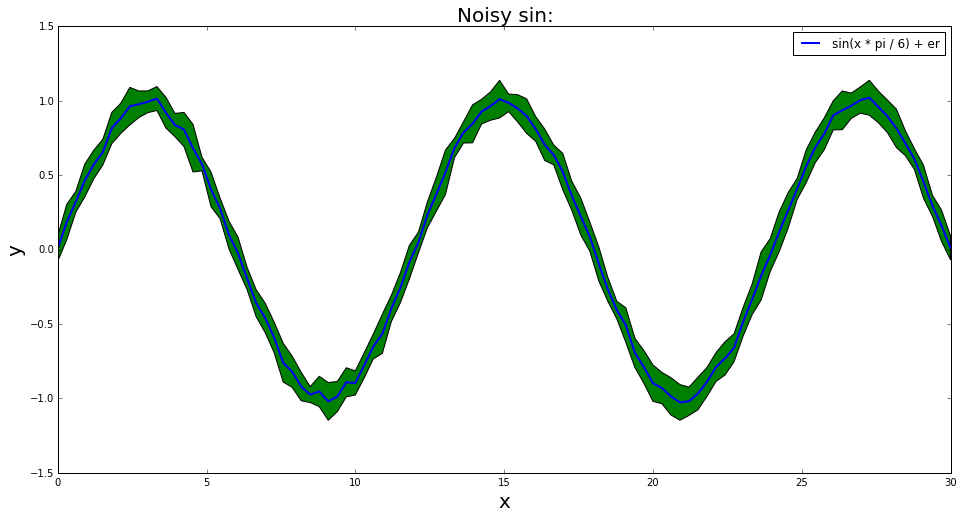

In [23]:
def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error

x, y, error = gen_uncertain_data()
plt.figure(figsize=(16, 8))
curve, = plt.plot(x, y, linewidth=2.0, color='blue')
plt.title('Noisy sin:', size=20)
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
strip = plt.fill_between(x, y + error, y - error, facecolor='green')
plt.legend([curve], ['sin(x * pi / 6) + er'], fontsize=12)
plt.show()

**2. (1 балл)** Отобразите гистограмму распределения возрастов для каждого класса пассажиров (здесь нужно использовать данные из заданий по pandas). В результате вы должны получить три гистограммы, которые необходимо отобразить рядом друг с другом используя функцию plt.subplots. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры figsize, sharey, sharex функции plt.subplots. Также полезными могут оказаться параметры bins, normed функции plt.hist.

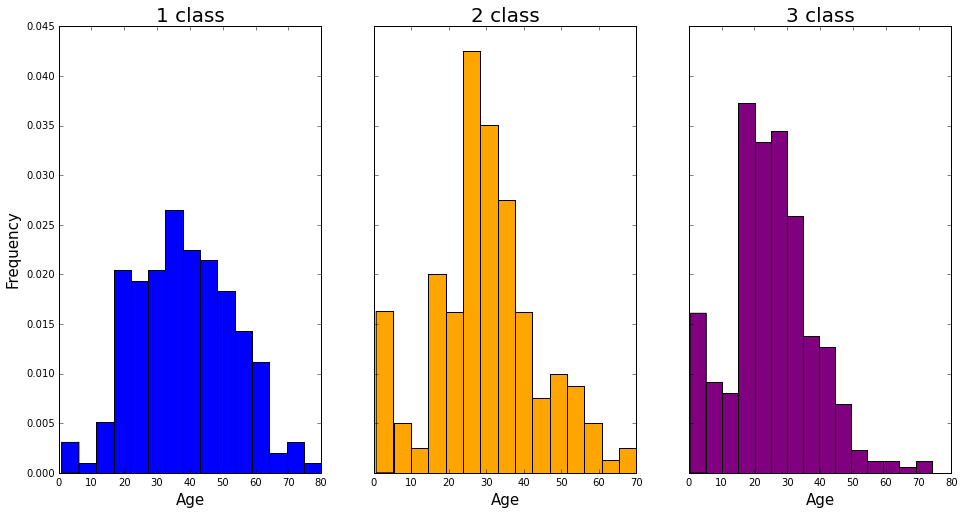

In [24]:
first_class = data[data['Pclass'] == 1]['Age'].dropna(how='any').tolist()
second_class = data[data['Pclass'] == 2]['Age'].dropna(how='any').tolist()
third_class = data[data['Pclass'] == 3]['Age'].dropna(how='any').tolist()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16, 8))
ax1.set_xlabel('Age', size=15)
ax1.set_ylabel('Frequency', size=15)
ax1.set_title('1 class', size=20)
ax1.hist(first_class, bins=15, normed=True, color='blue')
ax2.set_xlabel('Age', size=15)
ax2.set_title('2 class', size=20)
ax2.hist(second_class, bins=15, normed=True, color='orange')
ax3.set_xlabel('Age', size=15)
ax3.set_title('3 class', size=20)
ax3.hist(third_class, bins=15, normed=True, color='purple')
plt.show()